# Chap 1: Experiment 1

## Training a NN with a single hidden layer

This notebook trains a NN with a single hidden layer and outputs some metrics such as the train and validation set accuracies.

In [2]:
# Setup logging
import logging
from digit_classifier import base, DigitClassifier, DEVICE, Metrics, DigitClassifierConfig
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import pickle
sns.set_theme()

In [3]:
base() # Set seeds

In [6]:
# Model parameters
config = DigitClassifierConfig(
	sizes=[784, 30, 10],
	learning_rate=3,
  device=DEVICE,
  loss = nn.MSELoss(reduction='mean'),
  mini_batch = 10,
)

model_dir = Path("../resources/model/chap1/hidden_layer_mse/")
metrics_dir = model_dir / 'metrics.pkl'

## Train model

Note: this section can be skipped if model has already been trained

In [4]:
# Instantiate model for training
model = DigitClassifier(config)
model

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000
[digit_classifier] [INFO] Train set: 50000
[digit_classifier] [INFO] Valid set: 10000


DigitClassifier(
  (act_fn): Sigmoid()
  (linears): ModuleList(
    (0): Linear(in_features=784, out_features=30, bias=True)
    (1): Linear(in_features=30, out_features=10, bias=True)
  )
  (loss_module): MSELoss()
)

In [5]:
epochs = 10
metrics = Metrics()
model.train_loop(num_epochs=epochs, metrics=metrics)

[digit_classifier] [INFO] Epoch: 0: 9190.0 / 10000
[digit_classifier] [INFO] Epoch: 1: 9324.0 / 10000
[digit_classifier] [INFO] Epoch: 2: 9398.0 / 10000
[digit_classifier] [INFO] Epoch: 3: 9413.0 / 10000
[digit_classifier] [INFO] Epoch: 4: 9468.0 / 10000
[digit_classifier] [INFO] Epoch: 5: 9494.0 / 10000
[digit_classifier] [INFO] Epoch: 6: 9504.0 / 10000
[digit_classifier] [INFO] Epoch: 7: 9527.0 / 10000
[digit_classifier] [INFO] Epoch: 8: 9523.0 / 10000
[digit_classifier] [INFO] Epoch: 9: 9541.0 / 10000


In [7]:
# Save model
model.save_model(model_dir)

# Save metrics
with open(metrics_dir, 'wb')  as f:
  pickle.dump(metrics, f)

## Load data from checkpoint

If model has been trained before, you can skip here

In [16]:
# Load model
model = DigitClassifier.load_model(model_dir)

# Load metrics
with open(metrics_dir, 'rb') as f:
  metrics: Metrics = pickle.load(f)

[digit_classifier] [INFO] Train size: 60000
[digit_classifier] [INFO] Test size: 10000
[digit_classifier] [INFO] Train set: 50000
[digit_classifier] [INFO] Valid set: 10000


In [17]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret[:n-1] = a[:n-1]
    ret[n-1:] /= n
    return ret
    # return ret[n - 1:] / n
moving_average(np.arange(20))

array([ 0.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.,
       12., 13., 14., 15., 16., 17., 18.])

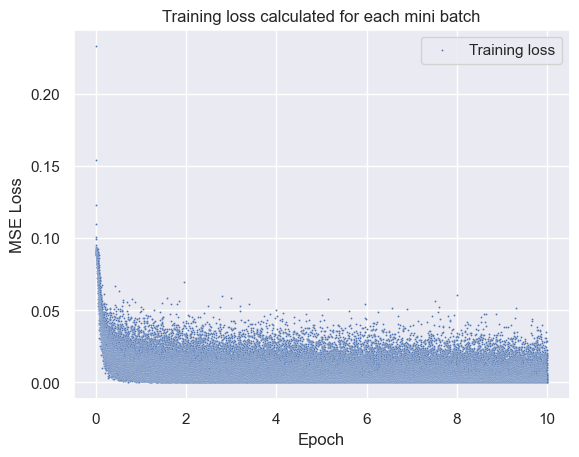

In [18]:
# Plot train loss (per batch)
x_epochs = np.arange(len(metrics.train_batch_loss)) / len(model.train_dataloader)
ax = sns.scatterplot(x=x_epochs, y=metrics.train_batch_loss, s=2, label="Training loss", legend="auto")
# sns.scatterplot(x = x_epochs, y=moving_average(train_loss_metrics, n=len(model.train_dataloader)))
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE Loss")
ax.set_title("Training loss calculated for each mini batch")
plt.show()

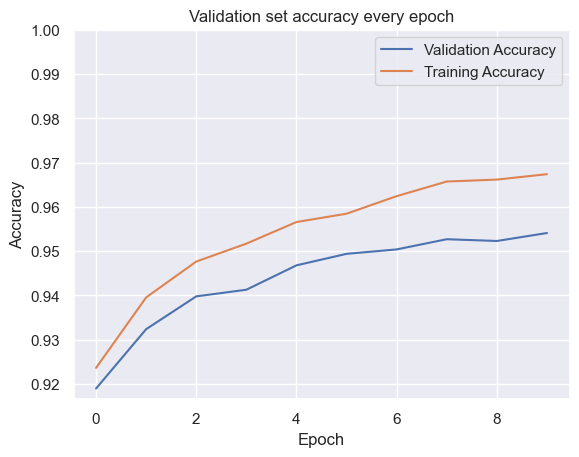

In [22]:
# Plot training and validation accuracy per epoch
ax = sns.lineplot(metrics.valid_precision_epoch,
                     label="Validation Accuracy")
sns.lineplot(metrics.train_precision_epoch, label="Training Accuracy")
ax.set_ylim(None, 1)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_title("Validation set accuracy every epoch")
plt.show()